In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1237,2020-08-07,United Kingdom,308074.0,308134.0,46492.0,46413.0,-60.0,79.0
1238,2020-08-07,Germany,213796.0,214214.0,9192.0,9183.0,-418.0,9.0
1239,2020-08-07,Iran,321097.0,320117.0,18031.0,17816.0,980.0,215.0
1240,2020-08-07,Turkey,237092.0,237265.0,5800.0,5798.0,-173.0,2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4433.980676328502
RMSE =  15707.825904181356


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  287.93961352657004
RMSE =  683.0483021659504


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  26780.63025210084
RMSE =  47802.4834660398
-- World performances for deaths --
MAE =  1551.9327731092437
RMSE =  1899.6195107742724


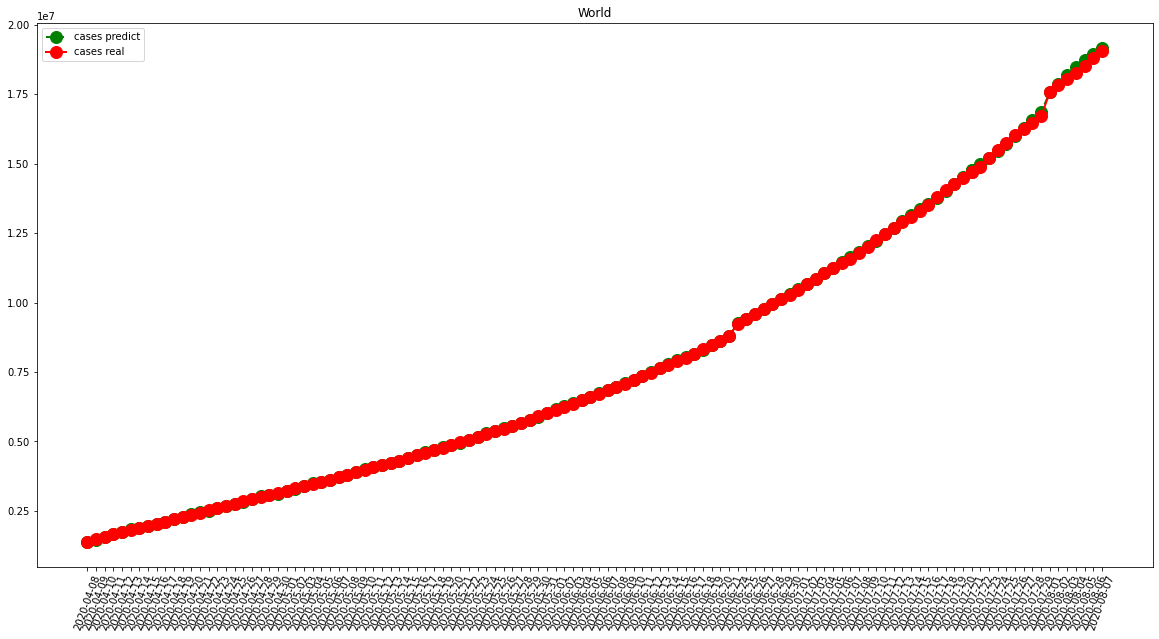

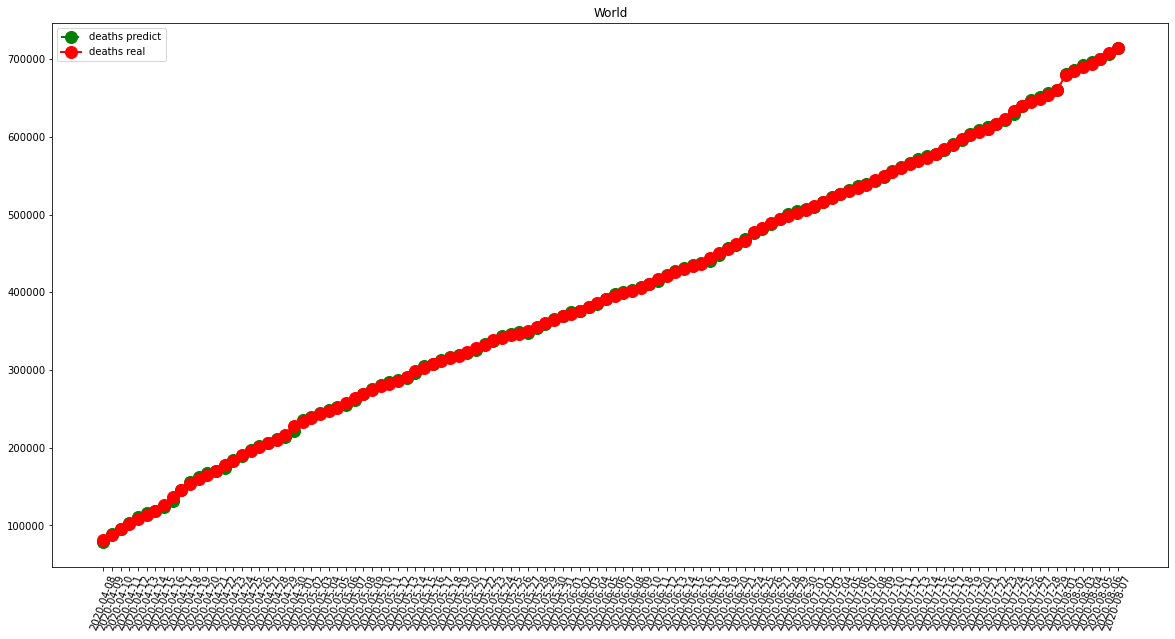

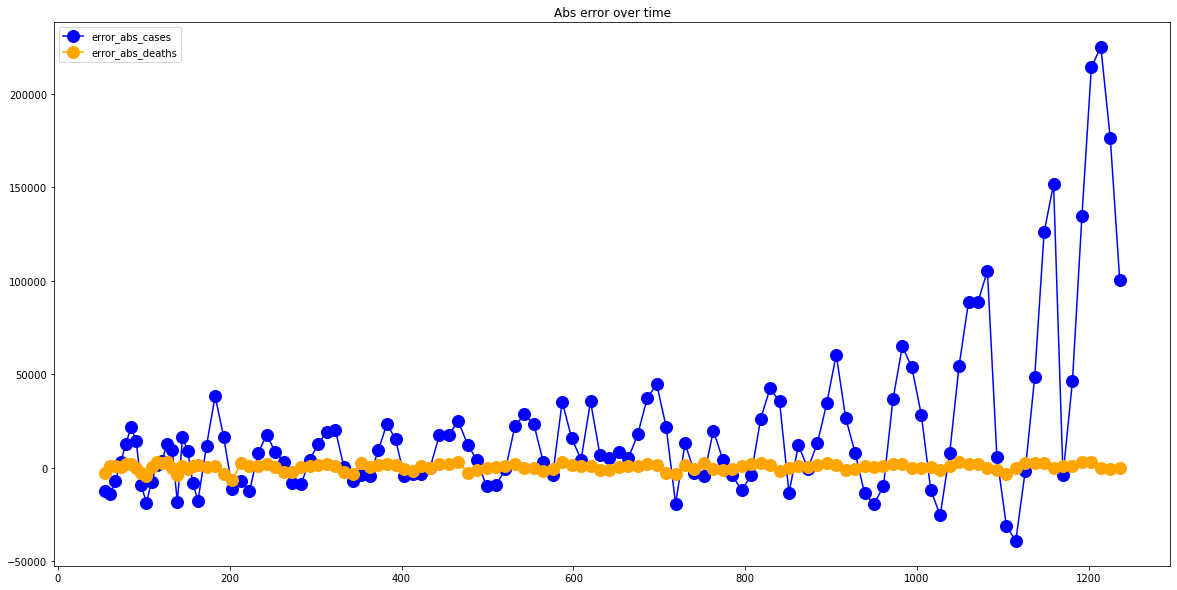

In [7]:
visShow("World")

-- France performances for cases --
MAE =  871.7209302325581
RMSE =  1377.8764022382272
-- France performances for deaths --
MAE =  141.14728682170542
RMSE =  295.1498371278377


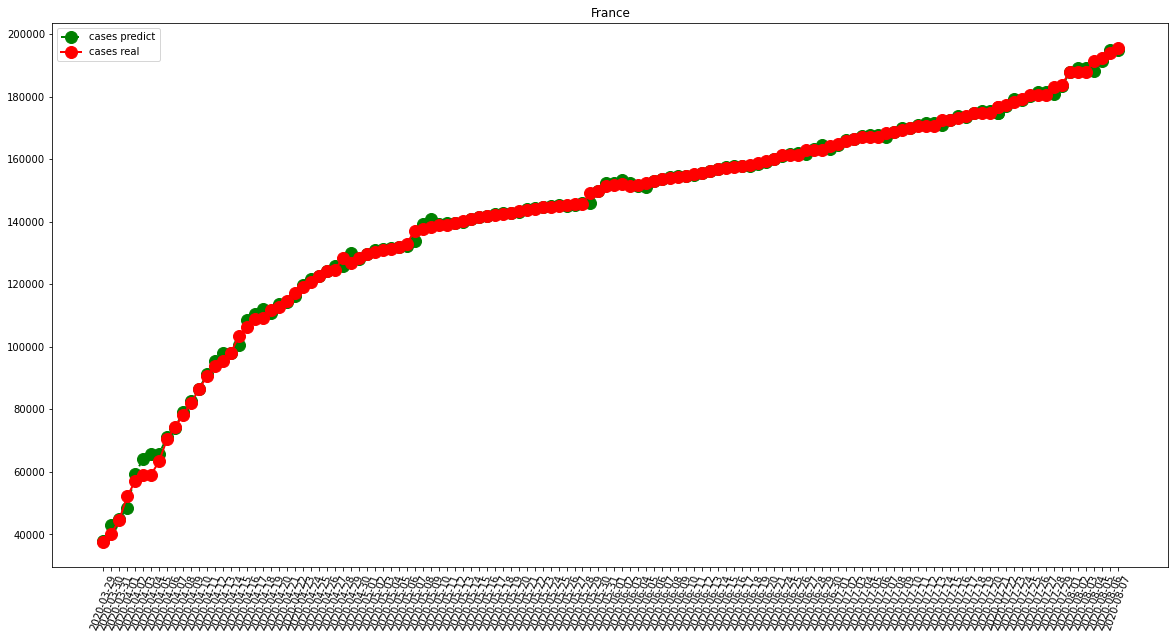

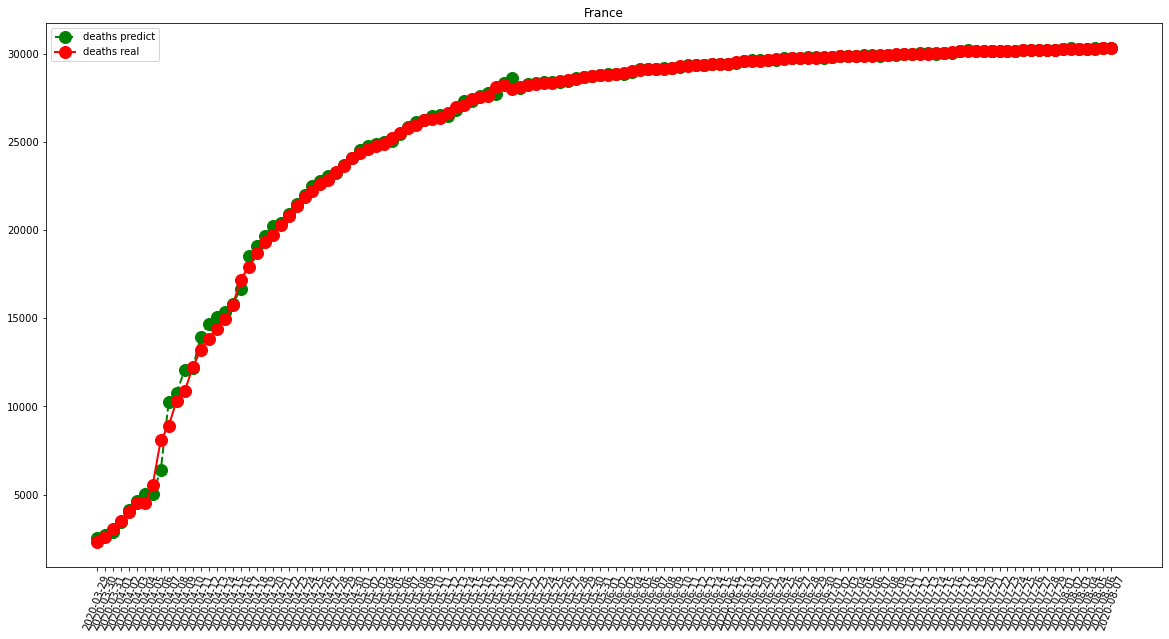

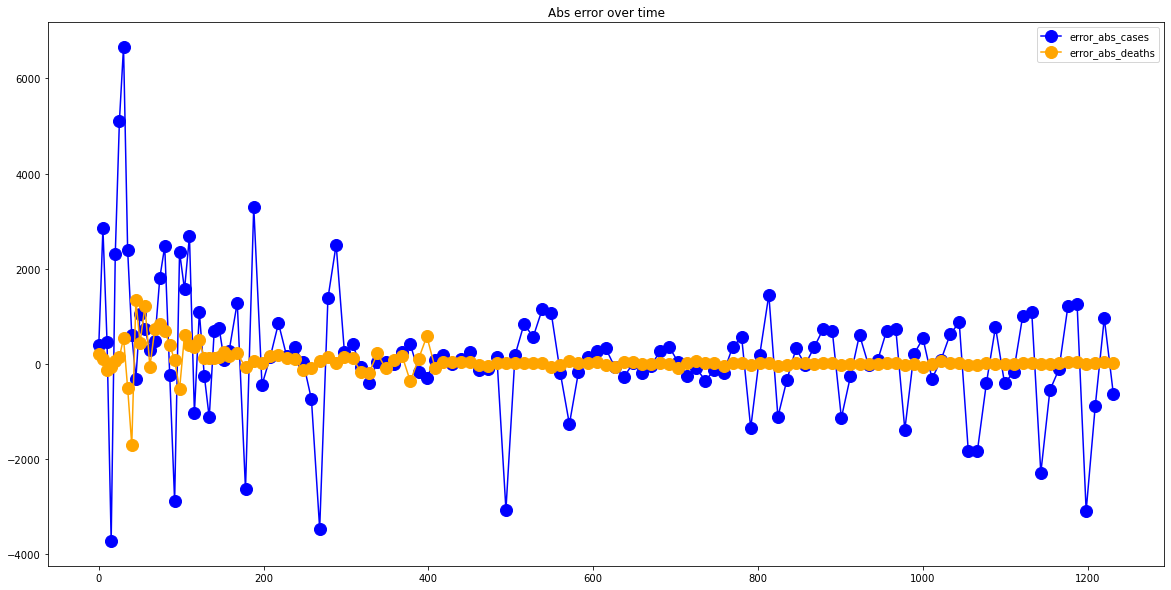

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  318.4573643410853
RMSE =  482.745531374466
-- Italy performances for deaths --
MAE =  80.82170542635659
RMSE =  260.62667470136563


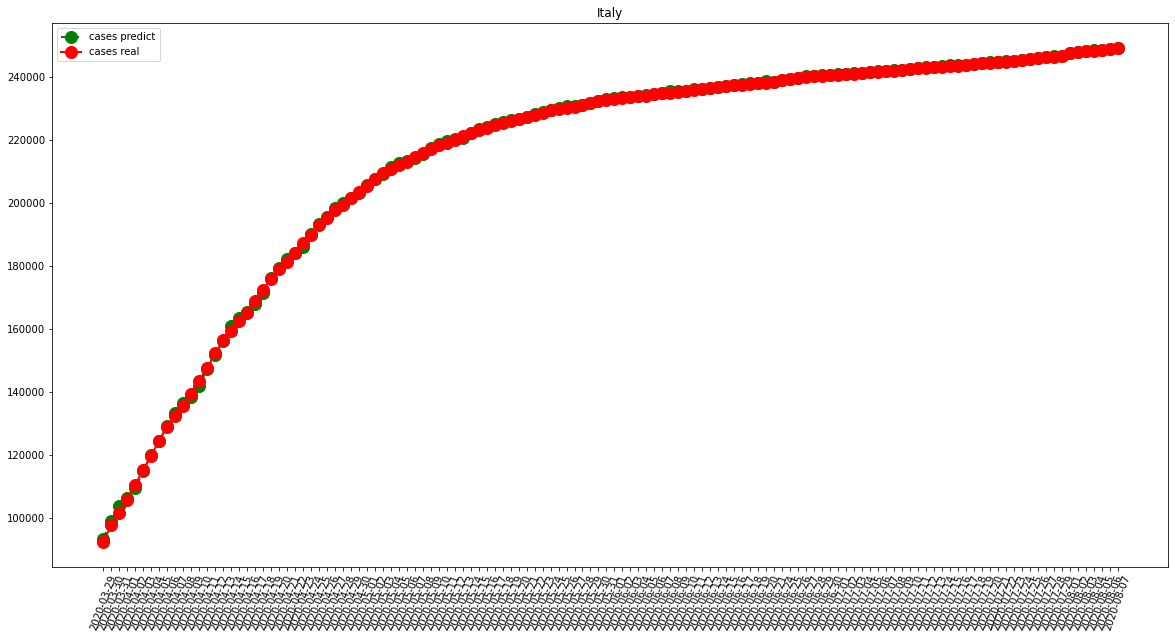

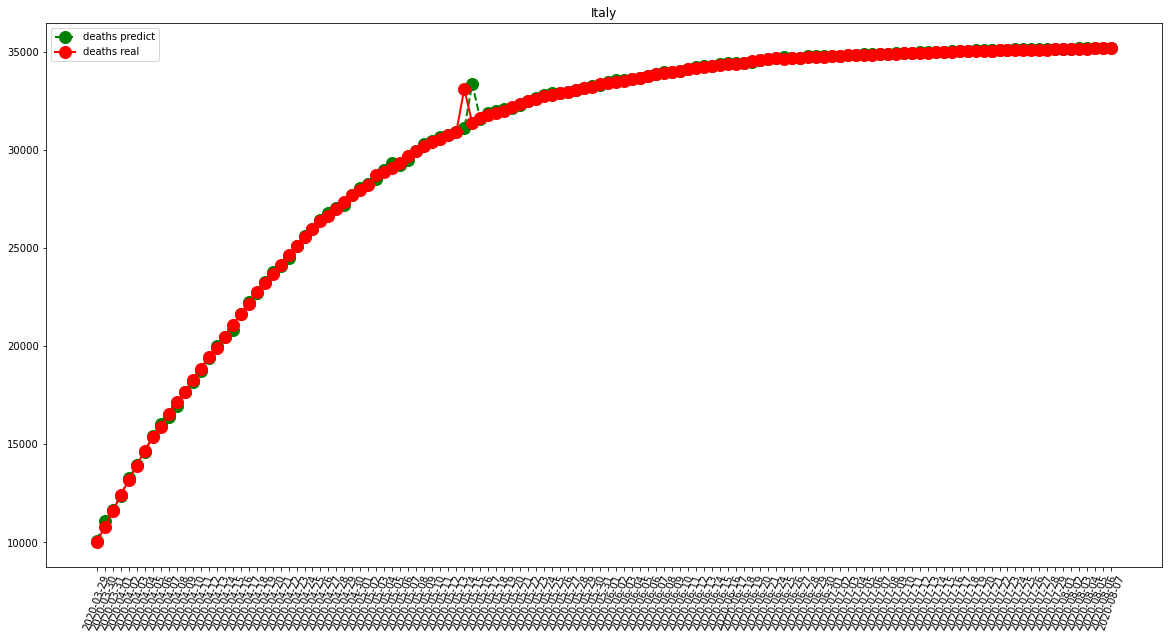

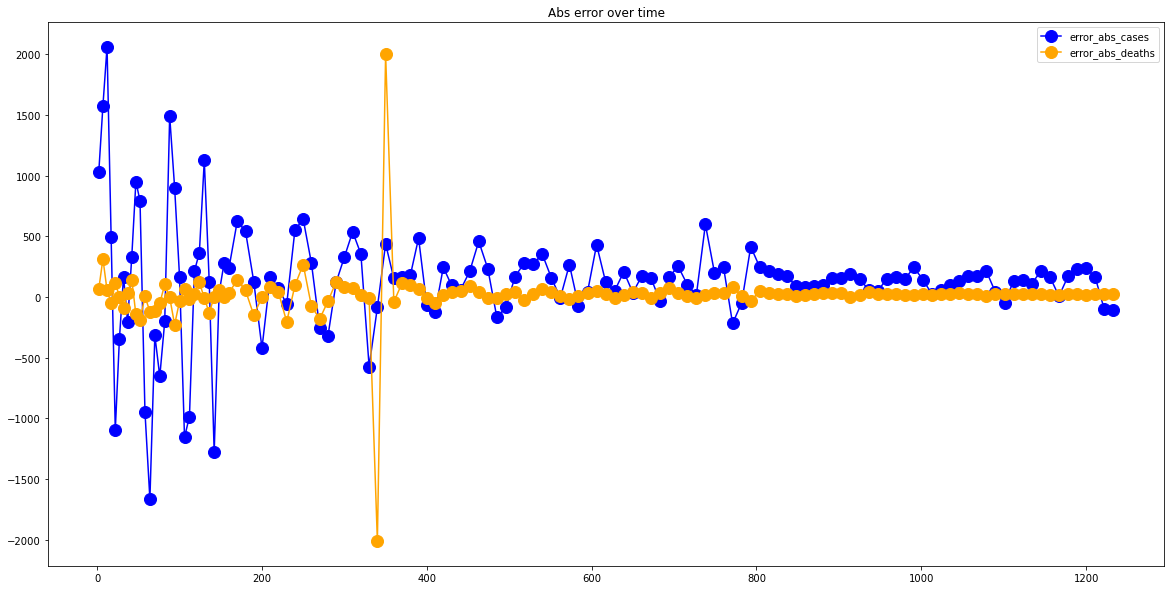

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1152.5193798449613
RMSE =  2278.3358012496346
-- Spain performances for deaths --
MAE =  143.5581395348837
RMSE =  357.42128748045496


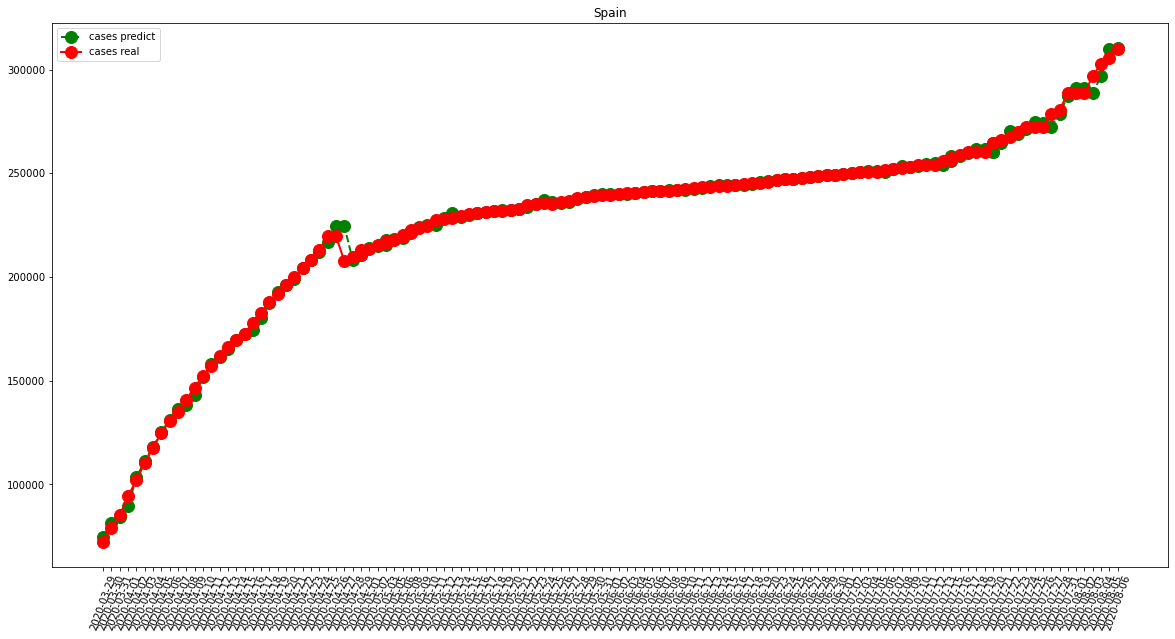

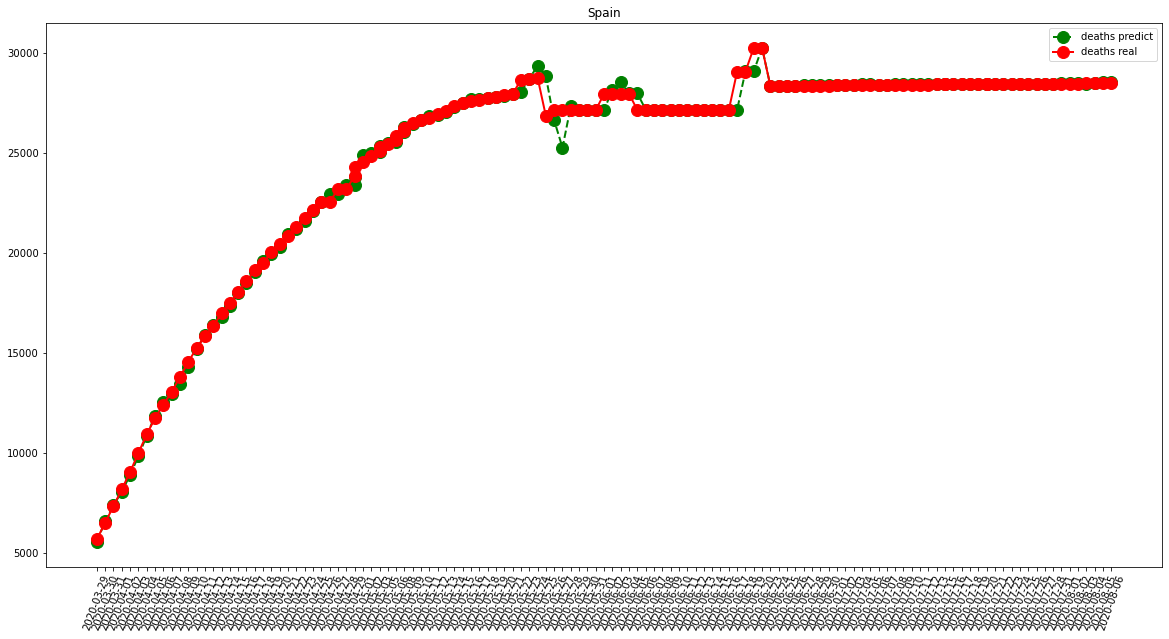

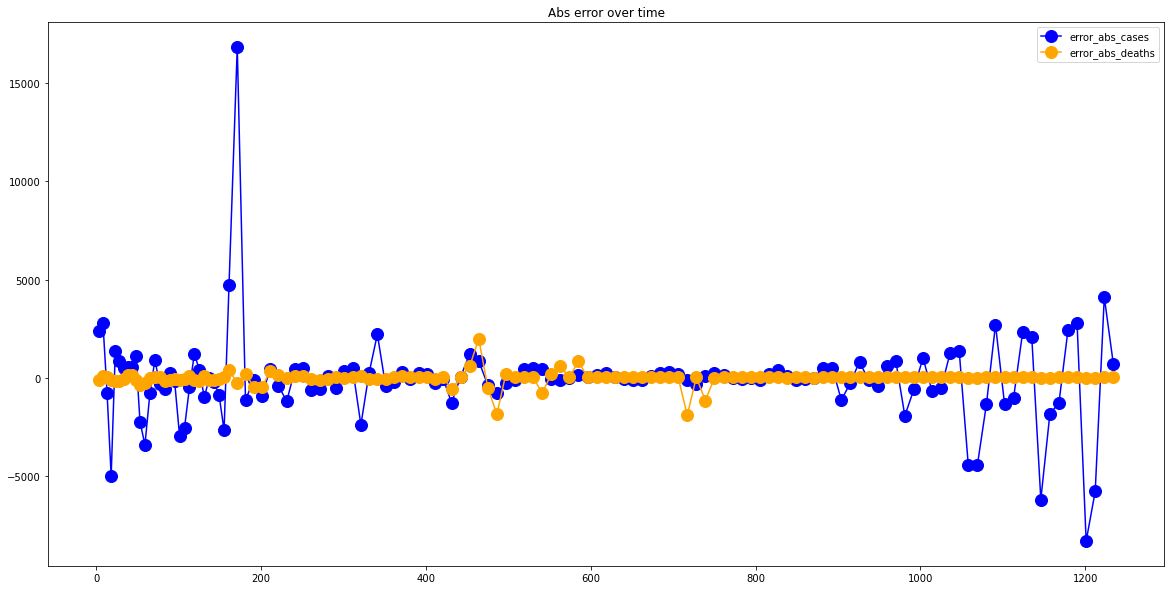

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  6868.3488372093025
RMSE =  9945.441190458481
-- United States performances for deaths --
MAE =  505.1782945736434
RMSE =  722.8069745655614


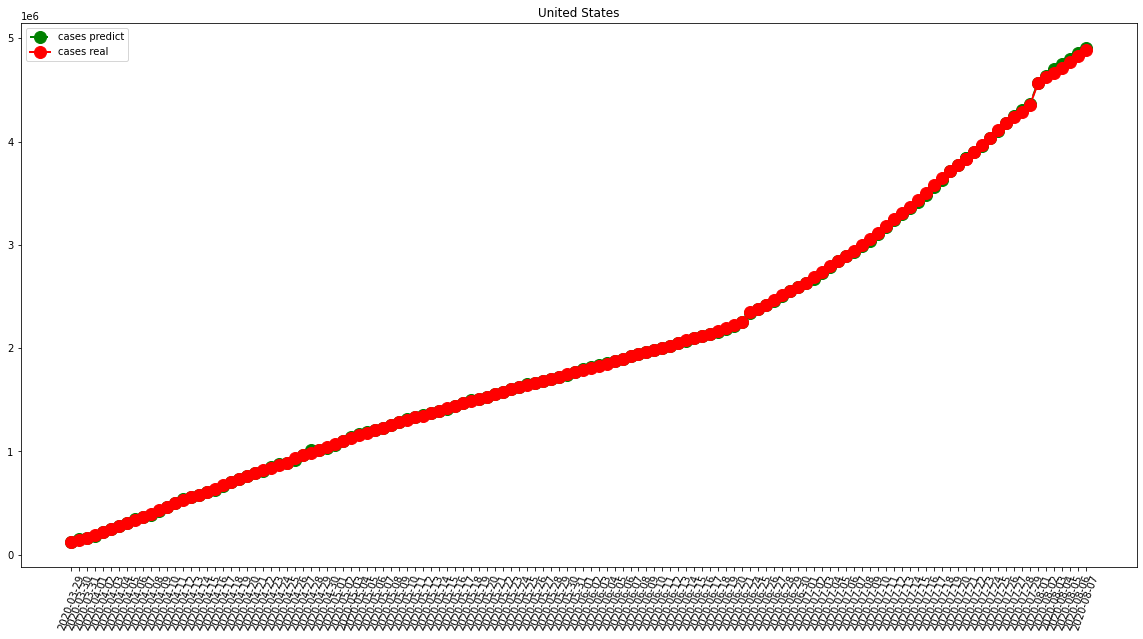

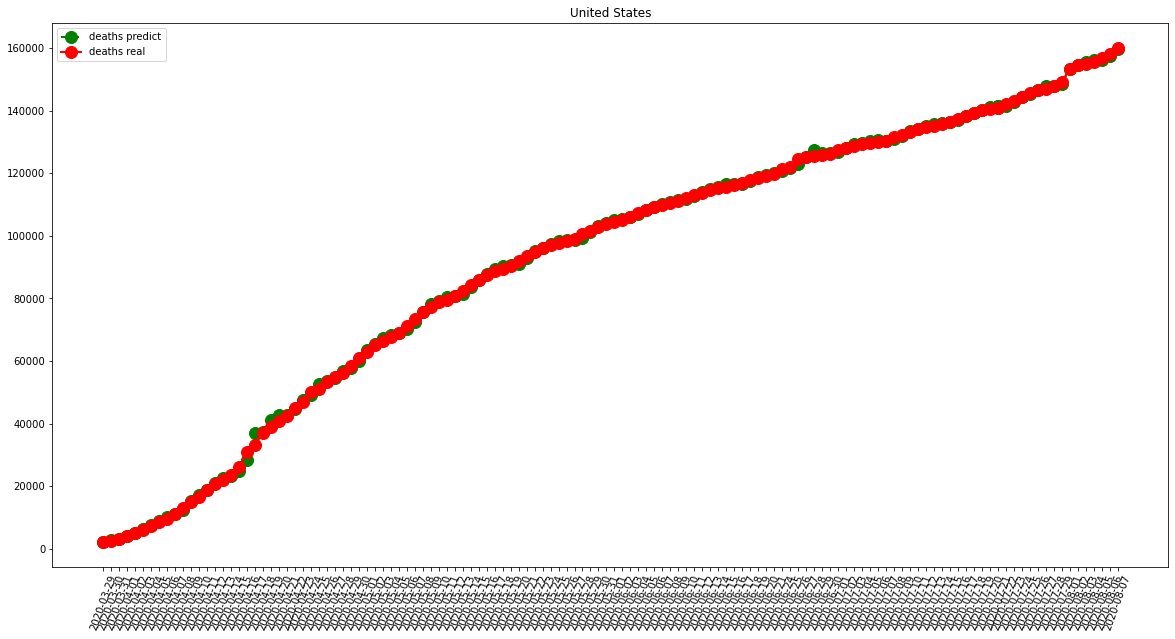

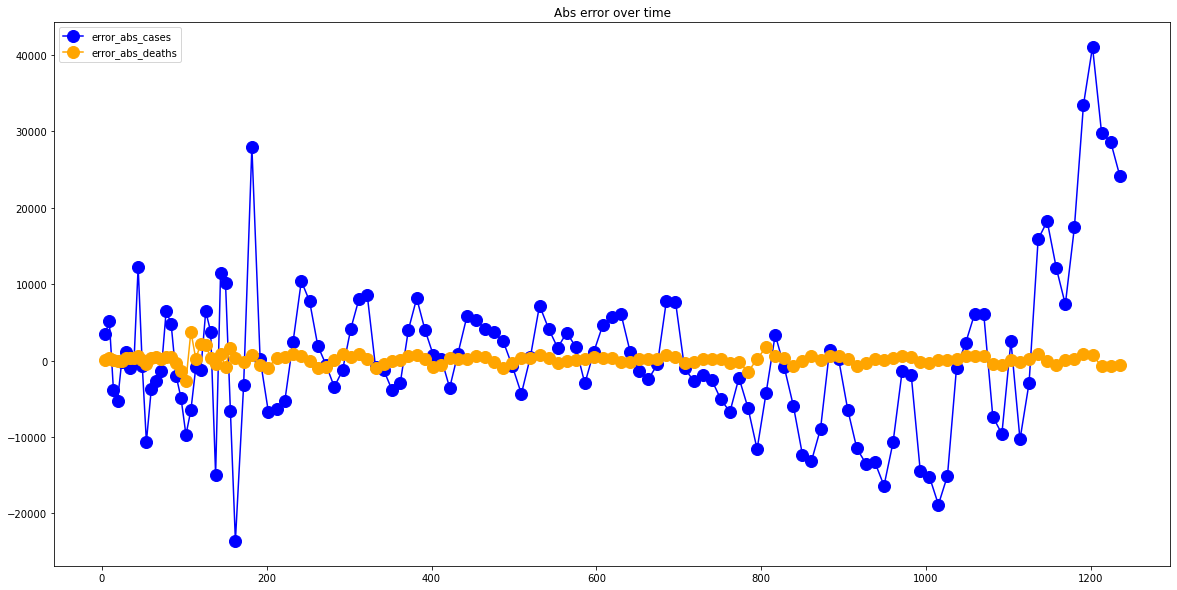

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  75.37209302325581
RMSE =  104.83235047172393
-- China performances for deaths --
MAE =  31.3953488372093
RMSE =  138.23191388208397


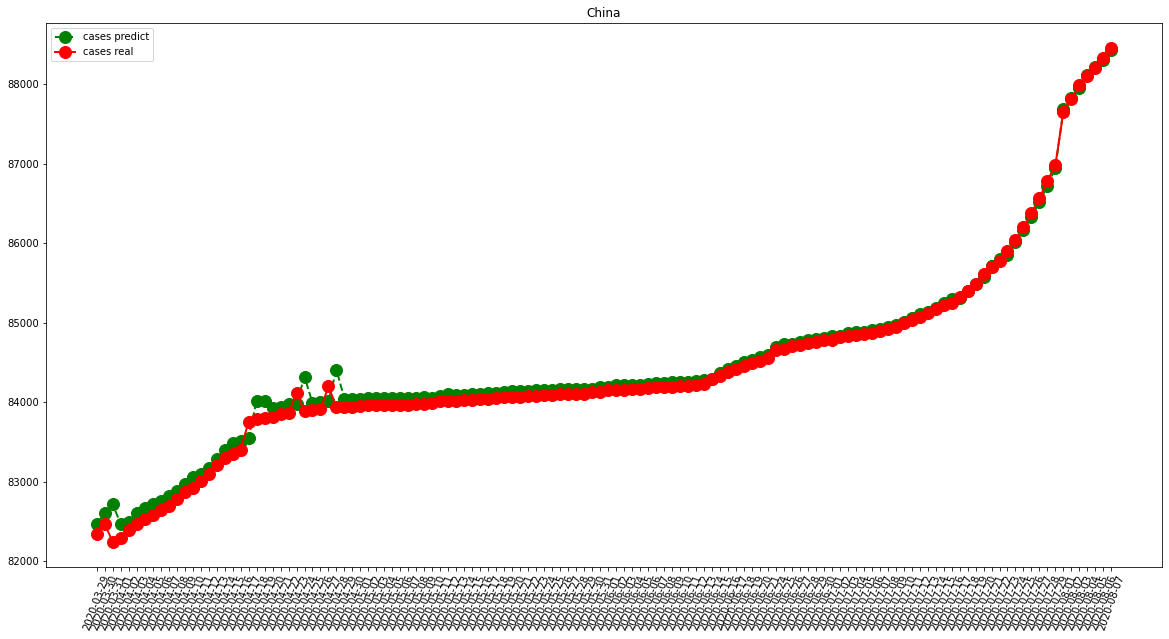

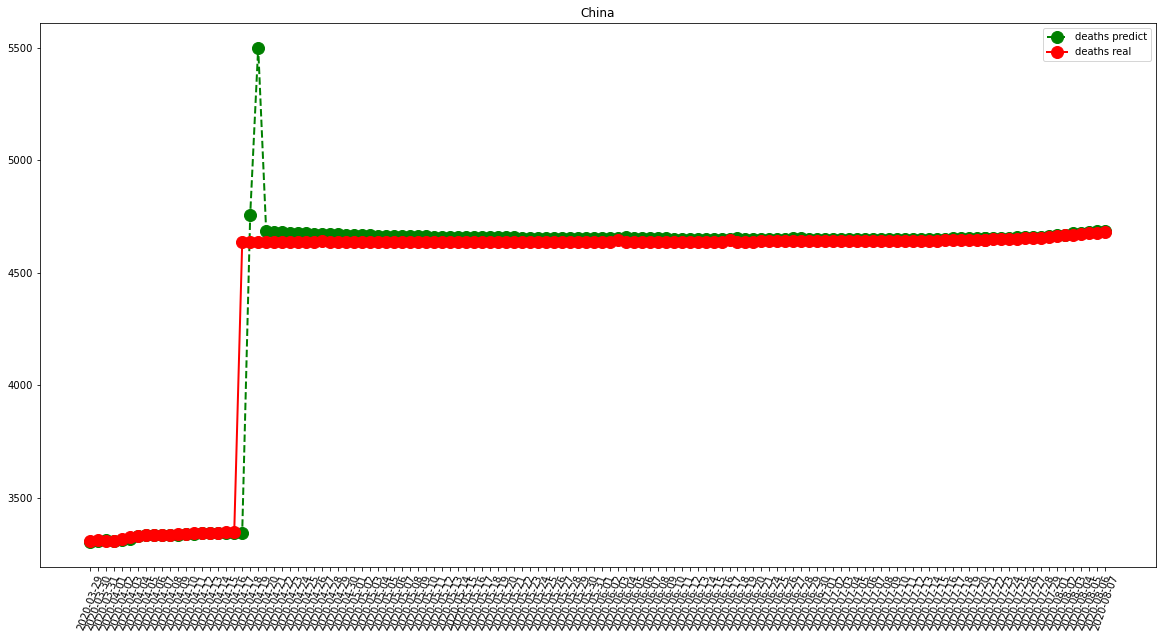

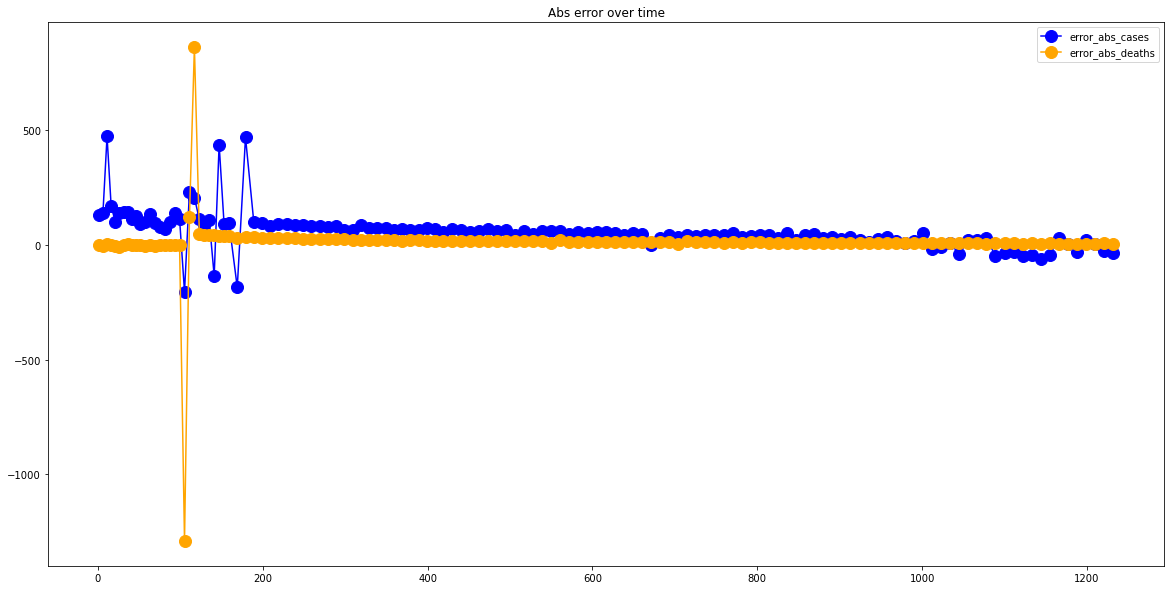

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1224.5346534653465
RMSE =  4153.23102661001
-- United Kingdom performances for deaths --
MAE =  193.12871287128712
RMSE =  488.73789772562895


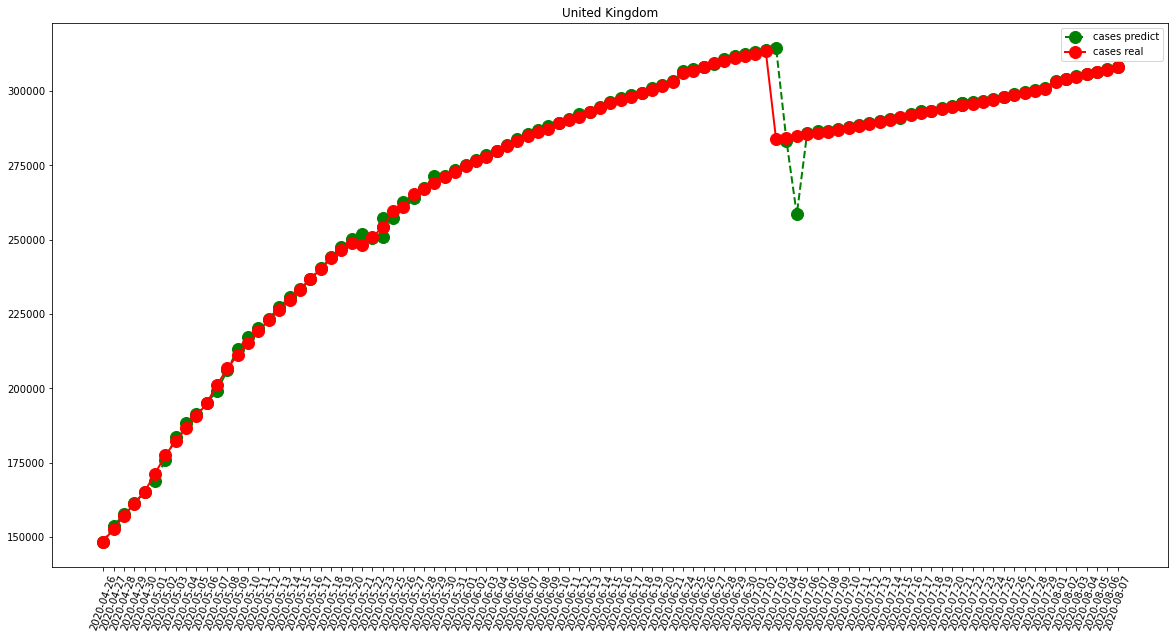

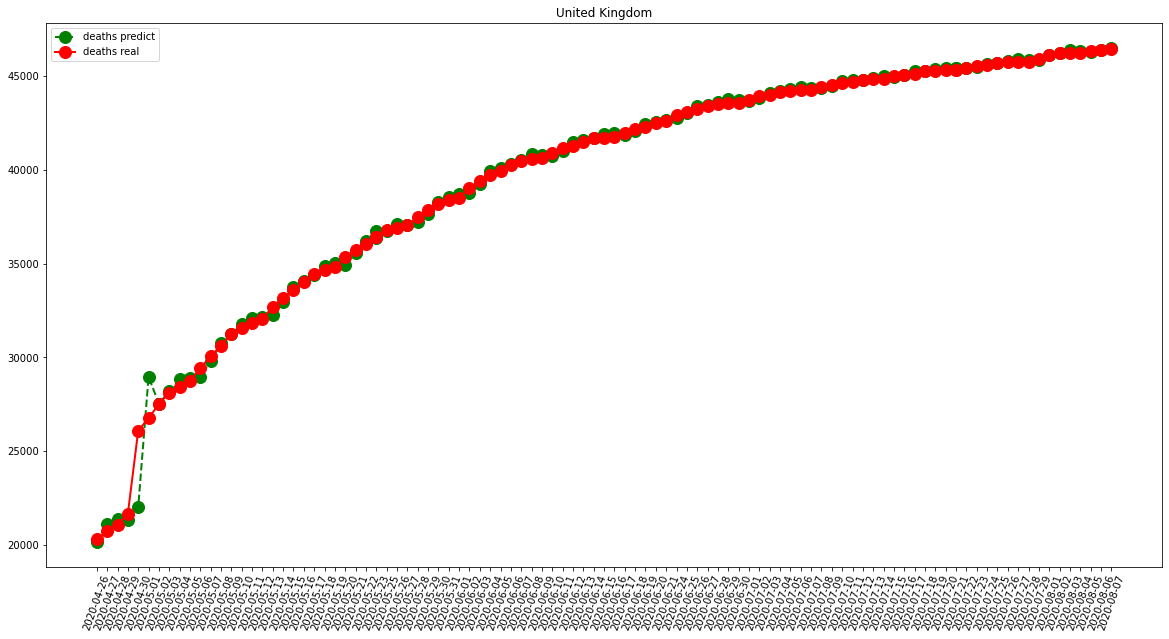

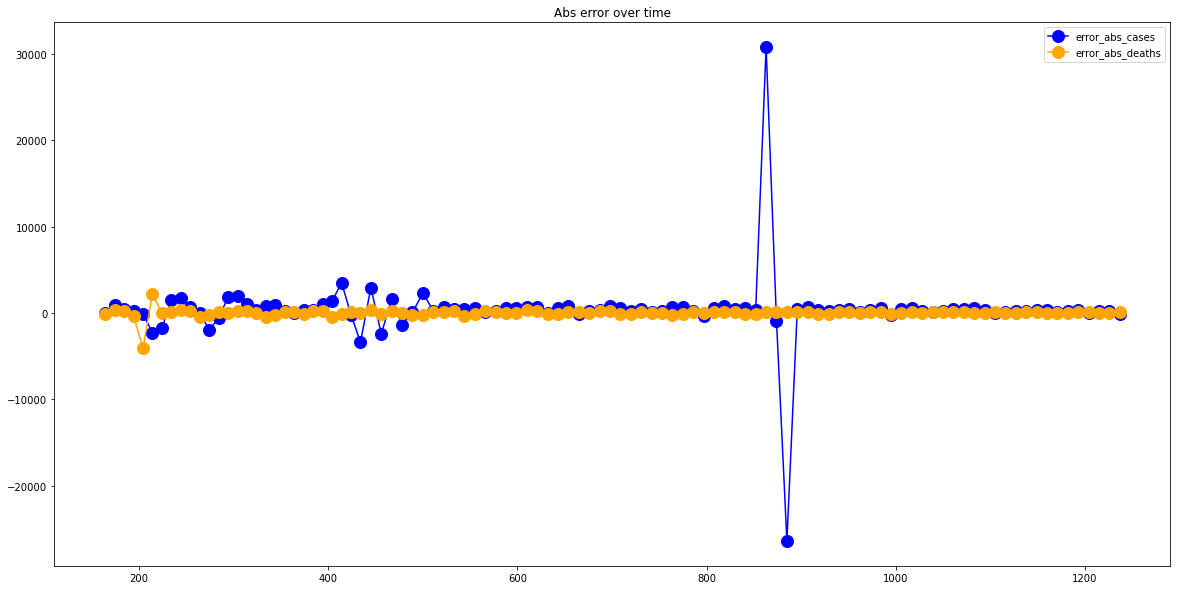

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  314.1980198019802
RMSE =  440.25811511066104
-- Germany performances for deaths --
MAE =  24.366336633663366
RMSE =  43.56411003530678


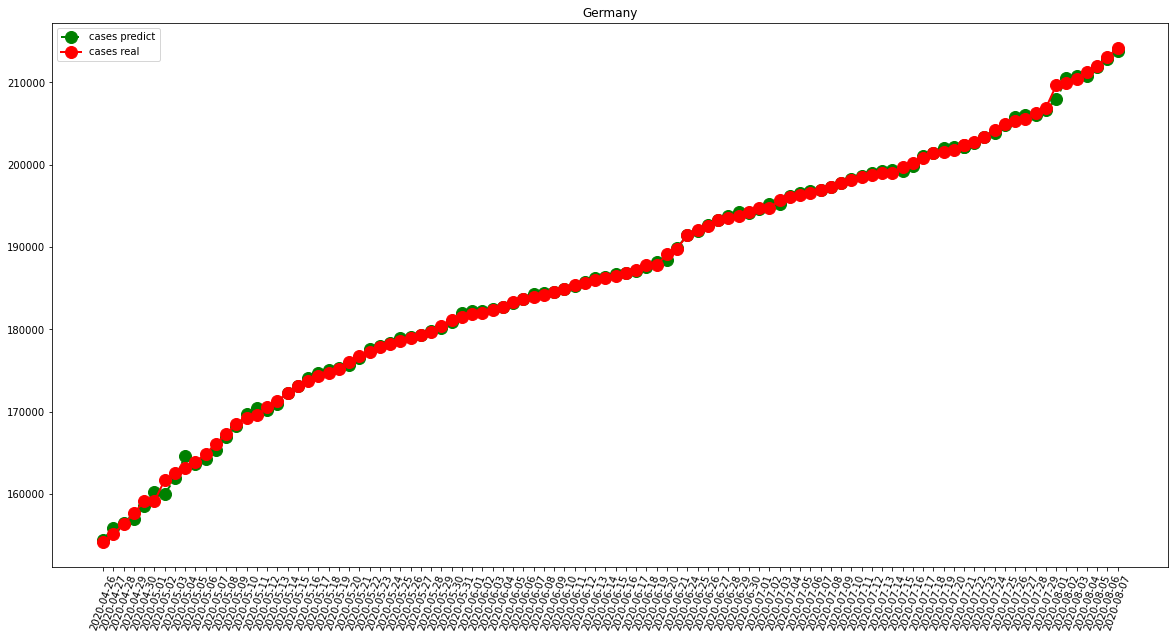

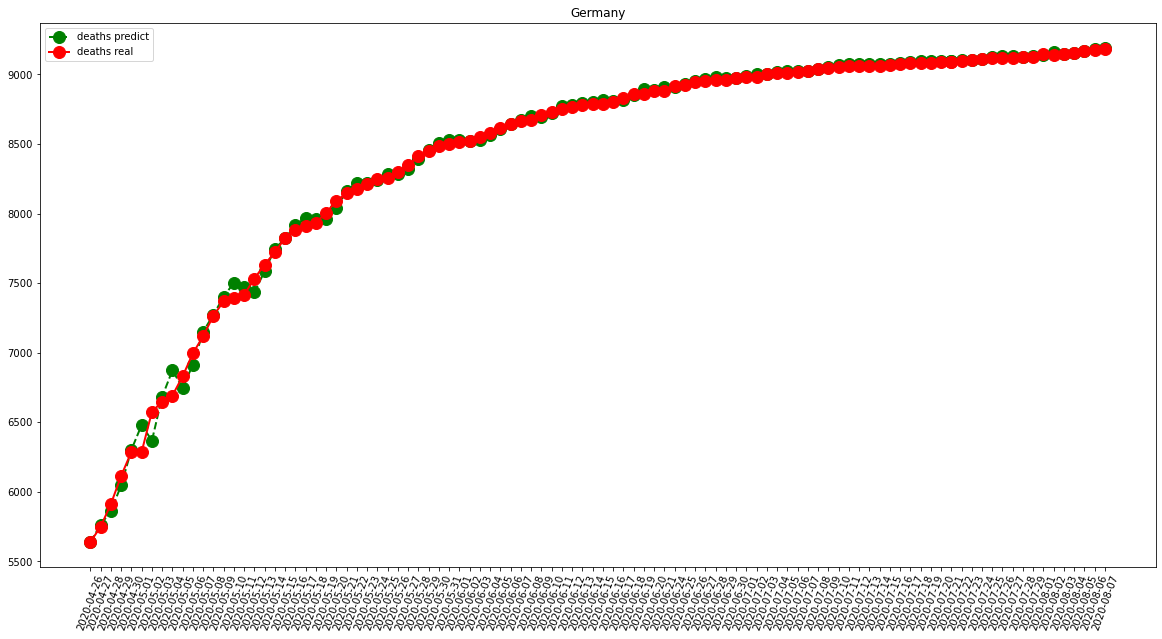

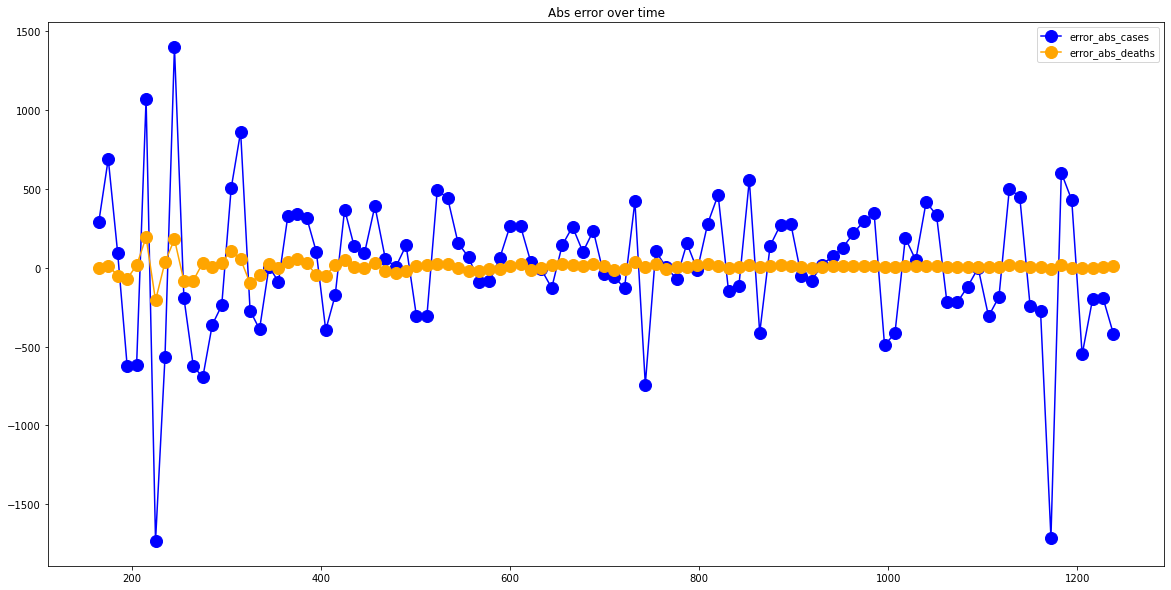

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  571.6138613861386
RMSE =  874.9395396367694
-- Iran performances for deaths --
MAE =  32.08910891089109
RMSE =  70.95480363171927


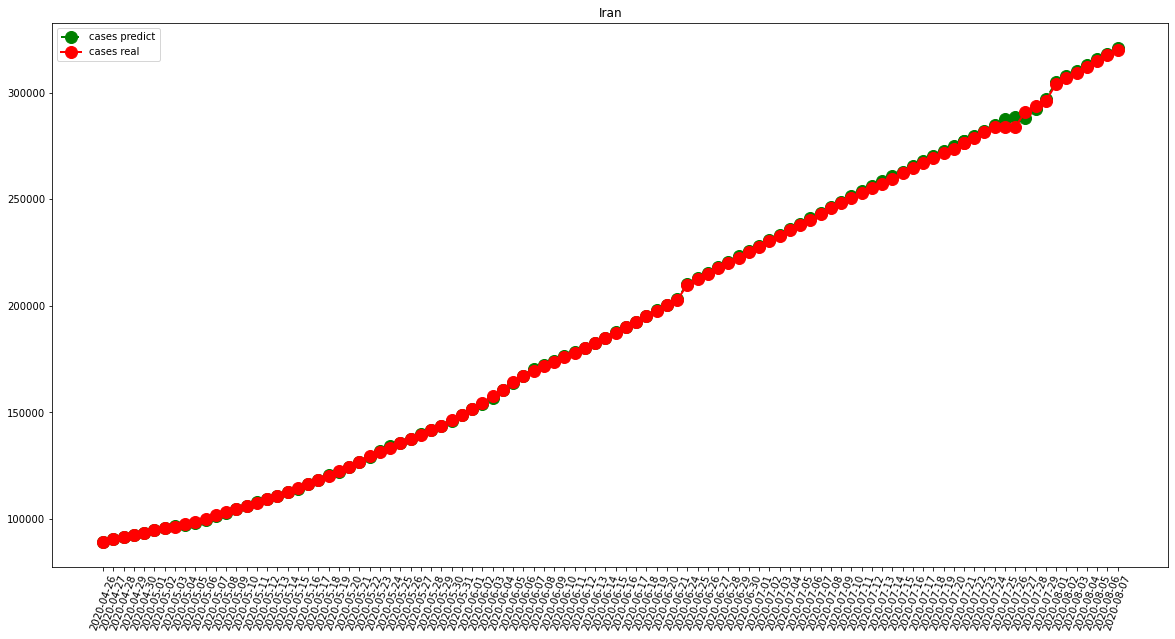

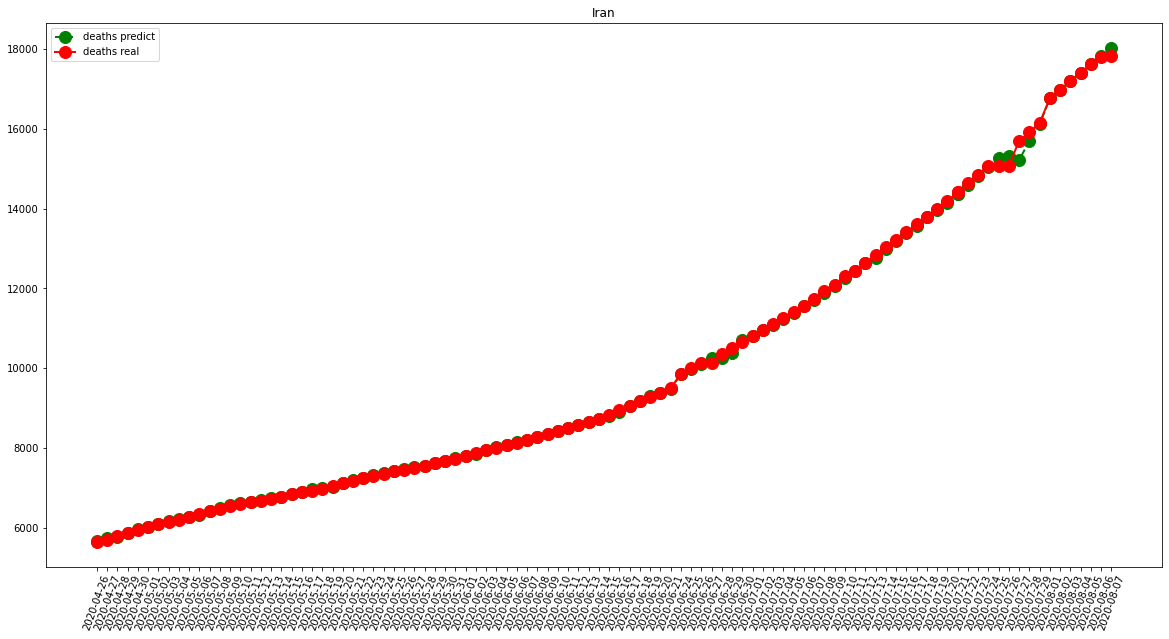

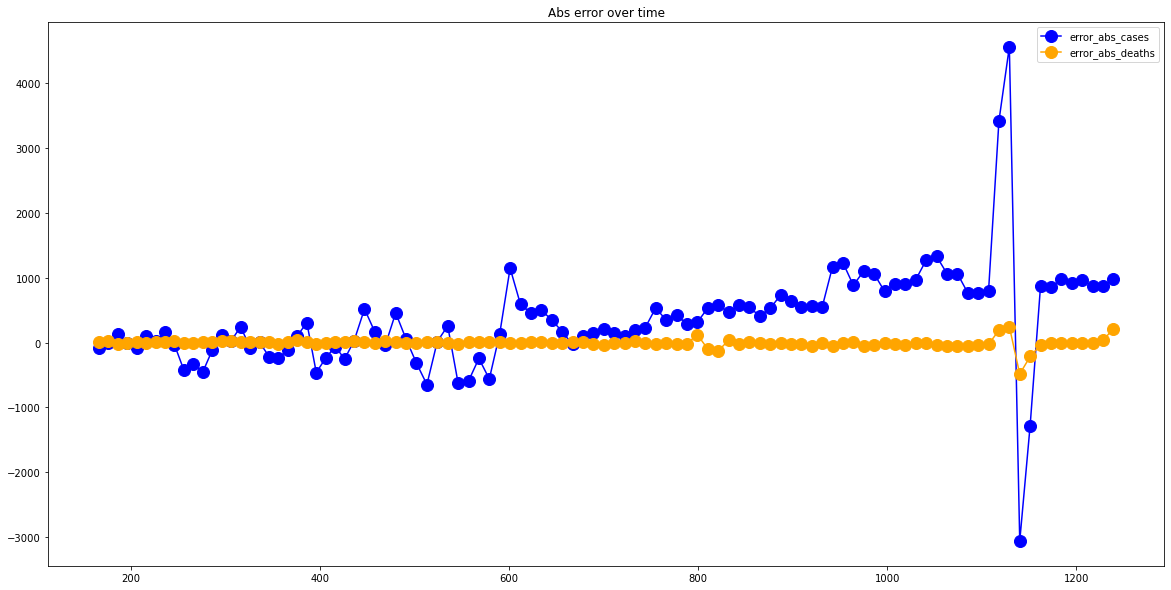

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  200.83168316831683
RMSE =  344.2743552505303
-- Turkey performances for deaths --
MAE =  18.801980198019802
RMSE =  101.0071559076606


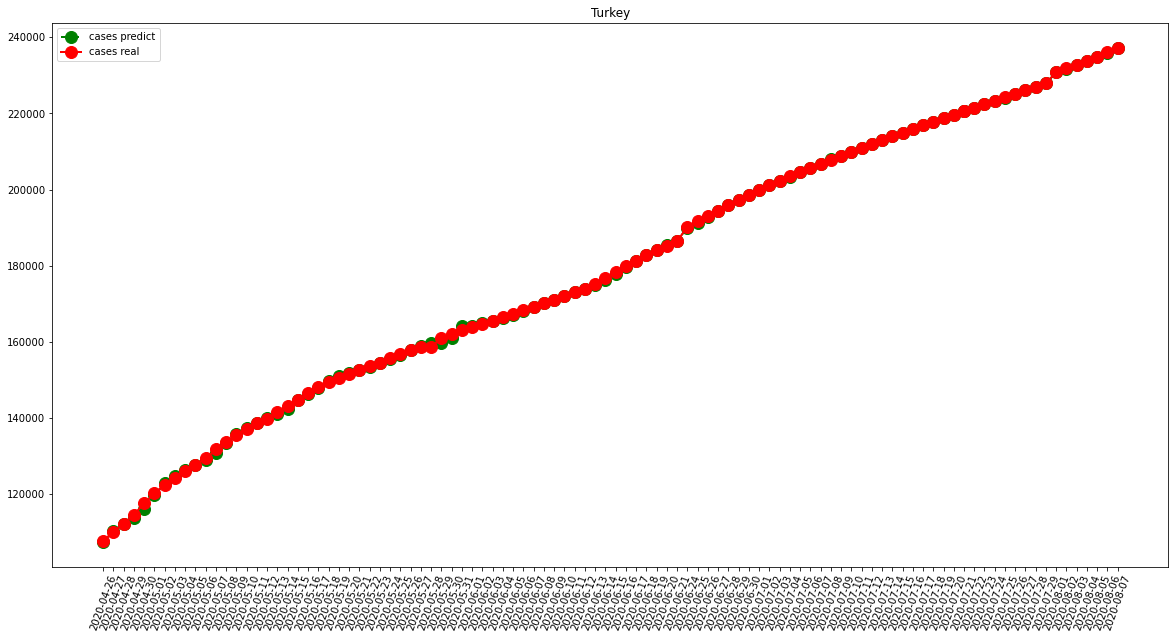

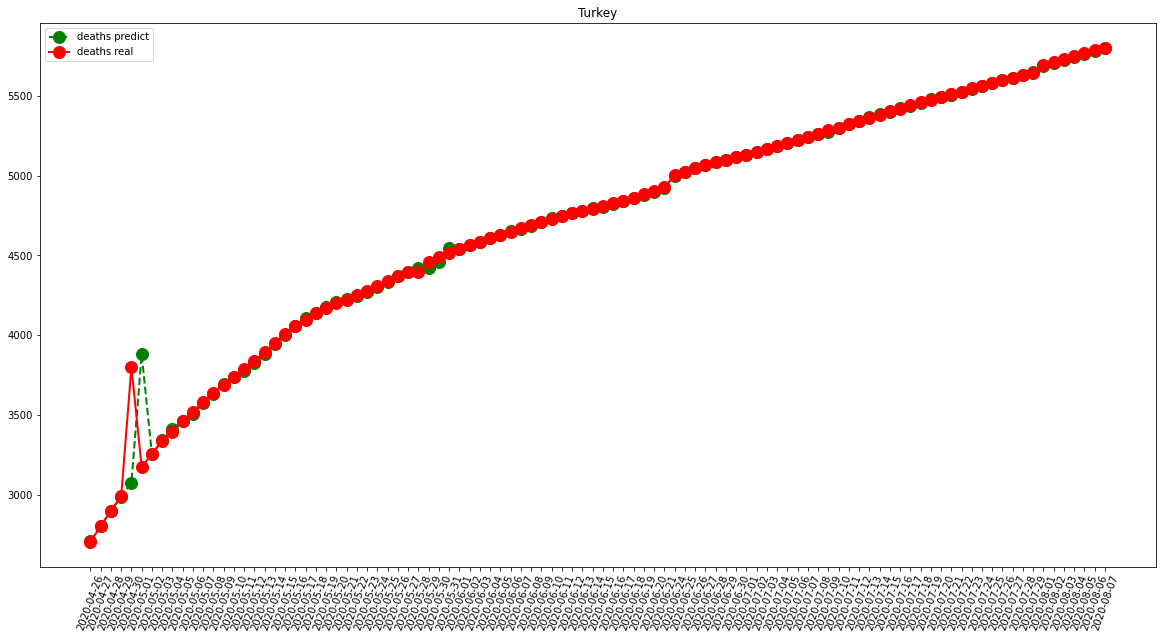

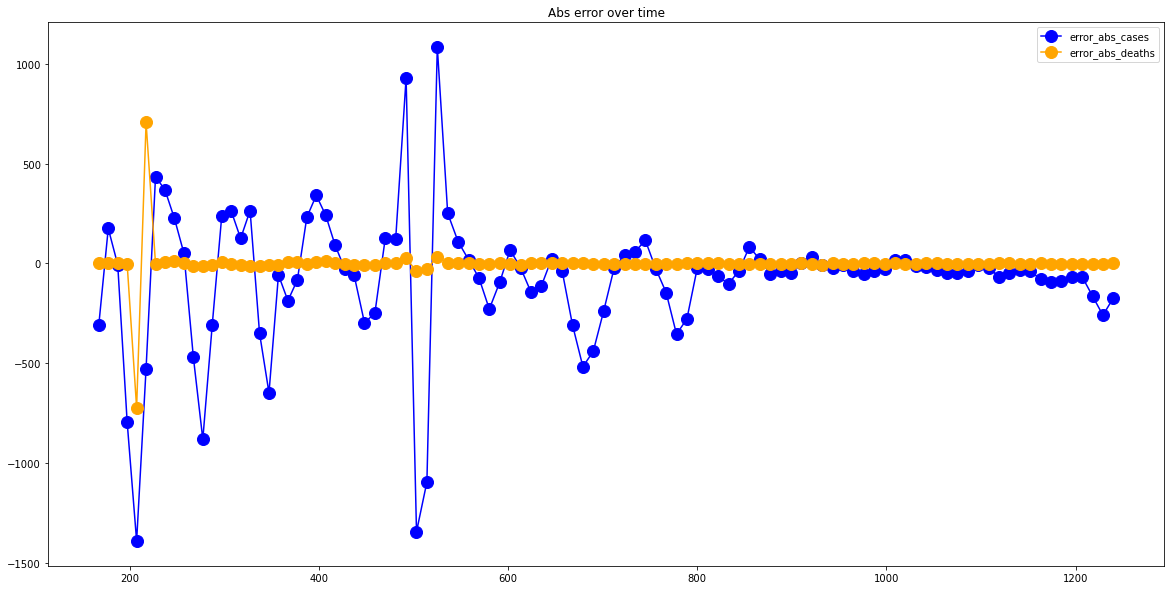

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12009.891891891892
RMSE =  16008.851668897327
-- Brazil performances for deaths --
MAE =  398.14864864864865
RMSE =  491.08983875634175


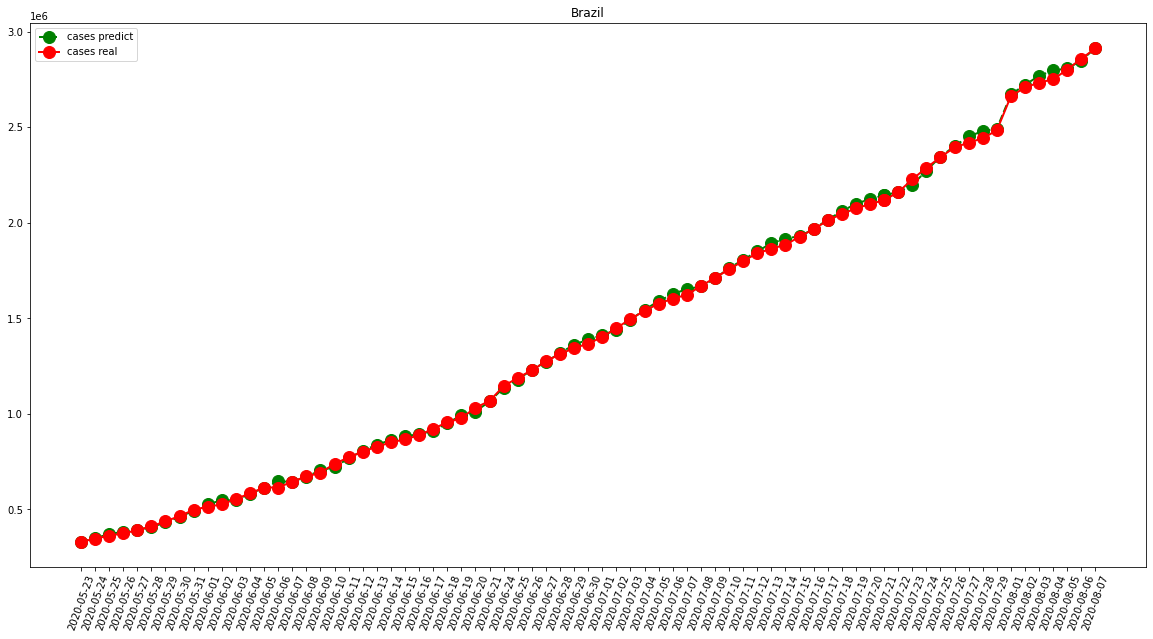

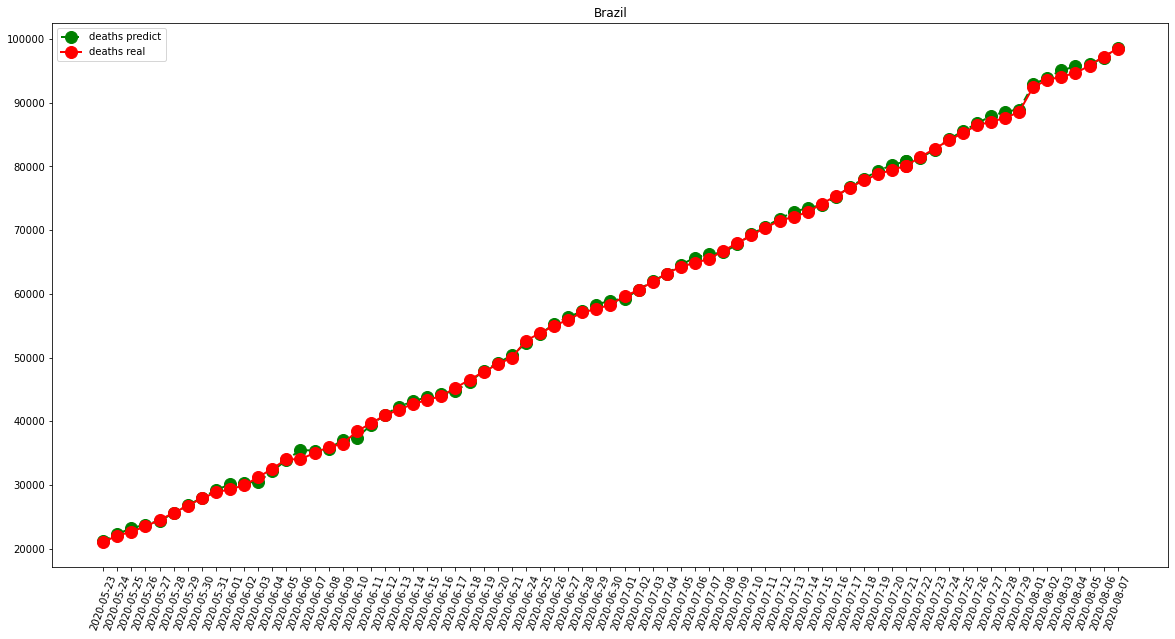

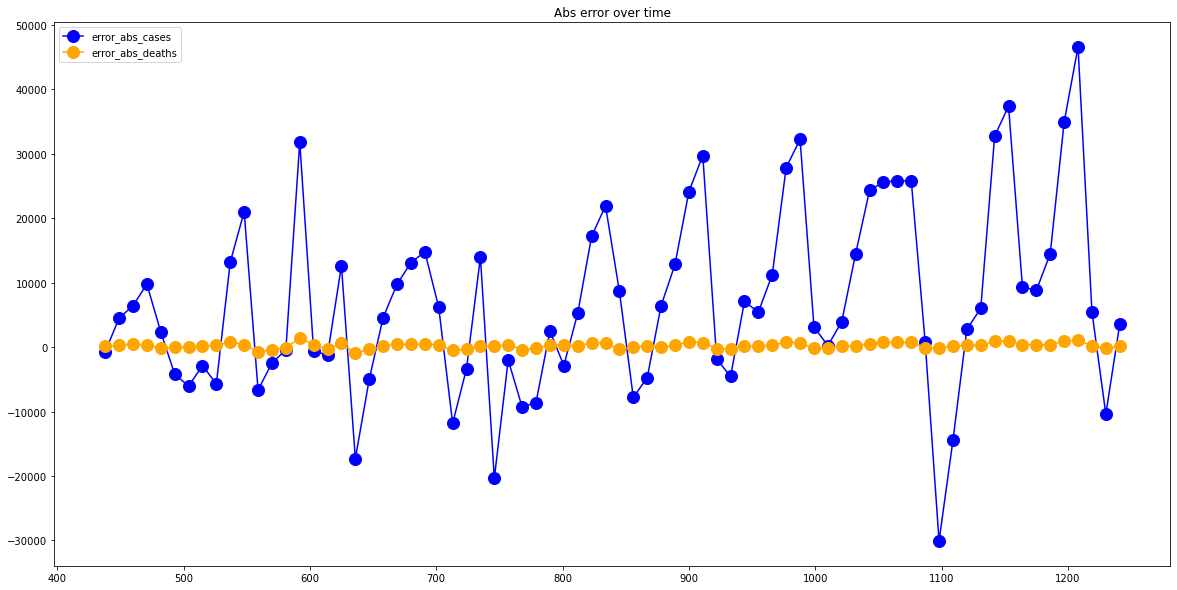

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)